# Linear Regression

## Iris dataset  

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold

In [60]:
from sklearn import datasets 
iris = datasets.load_iris() 

In [61]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [62]:
type(iris)

sklearn.utils.Bunch

In [63]:
X_all = iris.data 
X_all[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [64]:
X_all.shape

(150, 4)

In [65]:
X = X_all[:, 0] 
y = X_all[:, 2]
print(X[0:3])
print(y[0:3])

[5.1 4.9 4.7]
[1.4 1.4 1.3]


Text(0, 0.5, 'Petal length')

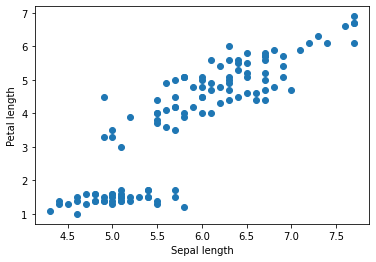

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, marker='o') 
plt.xlabel("Sepal length") 
plt.ylabel("Petal length")

In [69]:
from sklearn.linear_model import LinearRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train.reshape(-1,1), y_train) #resahpe을 통해 matrix로 바꿔준다. 
print("Train Score : {:.3f}".format(linr.score(X_train.reshape(-1,1), y_train)))
print("Test Score : {:.3f}".format(linr.score(X_test.reshape(-1,1), y_test)))

Train Score : 0.774
Test Score : 0.671


In [71]:
print(linr.coef_, linr.intercept_)

[1.88919201] -7.31000740273627


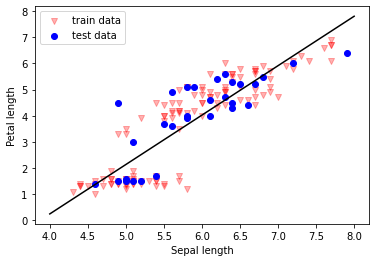

In [72]:
plt.scatter(X_train, y_train, marker='v', c='r', alpha=0.3) 
plt.scatter(X_test, y_test, marker='o', c='b') 
plt.legend(['train data', 'test data'])
plt.xlabel("Sepal length")
plt.ylabel("Petal length")

xx = np.linspace(4, 8, 3)
plt.plot(xx, linr.coef_ * xx + linr.intercept_, "k-")

- let's try predict  the petal width using the other 3 features

In [73]:
def adj_R2 (X, y, R2): 
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

X, y = X_all[:, 0:3], X_all[:, 3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linr = LinearRegression()
linr.fit(X_train, y_train)
print(linr.score(X_test, y_test), adj_R2(X_test, y_test, linr.score(X_test, y_test)))
linr.coef_, linr.intercept_

0.9422136052353997 0.9355459443010227


(array([-0.17807562,  0.19042953,  0.50509762]), -0.24579997390178776)

## KFold() Cross Validation 

In [77]:
X = X_all[:,0]
y = X_all[:,2]

cv = KFold(n_splits=5, shuffle=True)  # Returns the number of splitting iterations in the cross-validator. 5개의 블락으로 나누고 섞는다
score = cross_val_score(LinearRegression(), X.reshape(-1,1), y, cv=cv) #진행해주는 function

print(score.round(2))
print(score.mean().round(2))

[0.84 0.72 0.78 0.7  0.72]
0.75


In [78]:
## what is cv?
print(cv)
print(cv.get_n_splits(X))

KFold(n_splits=5, random_state=None, shuffle=True)
5


In [79]:
for train_index, test_index in cv.split(X):
    print("TRAIN:\n", train_index,'\n', "TEST:\n", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN:
 [  0   1   4   6   7   8   9  10  11  12  13  14  15  16  18  20  21  22
  23  24  25  26  27  30  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  48  50  51  52  53  55  56  57  59  61  62  64  66  67  68
  69  70  71  73  74  75  76  79  80  81  82  83  84  85  86  87  88  90
  91  92  94  95  96  97  99 100 101 103 104 105 106 107 109 110 111 114
 117 118 119 120 121 122 123 124 125 127 128 130 131 132 133 134 136 137
 138 139 140 141 142 143 144 145 146 147 148 149] 
 TEST:
 [  2   3   5  17  19  28  29  31  47  49  54  58  60  63  65  72  77  78
  89  93  98 102 108 112 113 115 116 126 129 135]
TRAIN:
 [  1   2   3   4   5   7   8  10  13  14  15  17  19  20  21  22  24  25
  27  28  29  30  31  32  33  34  36  39  40  41  42  44  46  47  48  49
  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  67  69
  70  71  72  73  74  75  76  77  78  79  80  82  83  84  85  87  88  89
  91  92  93  94  95  96  97  98  99 100 102 103 104 105 106 107 108 109

In [80]:
## using decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train.reshape(-1,1), y_train) 
print(dec_reg.score(X_test.reshape(-1,1), y_test))

0.8171477566522979


## 몸무게 예측

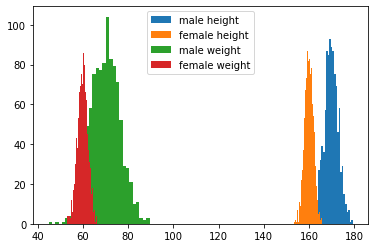

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 1000
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 160

y1 = 2*x1 - 270 + 2*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + np.random.randn(n_samples)   # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.legend(['male height','female height','male weight','female weight'])
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[2.01613704]
0.8843765504326793


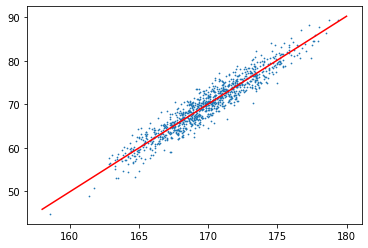

In [84]:
xs = np.linspace(158, 180, 100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x1, y1, s=0.5)
plt.plot(xs, ys, c='r')

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[0.99799923] -99.73972451676845
0.7823415816597358


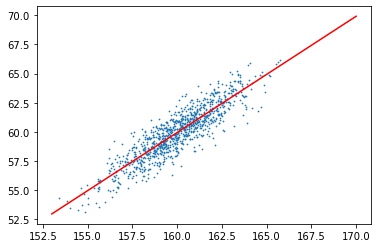

In [86]:
xs = np.linspace(153,170,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

In [87]:
# put together
x = np.concatenate((x1, x2))   # height
y = np.concatenate((y1, y2))   # weight

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

print(leg1.coef_, leg1.intercept_)
print(leg1.score(X_test.reshape(-1,1), y_test))

[1.15146919] -125.04661214853732
0.8669558686438072


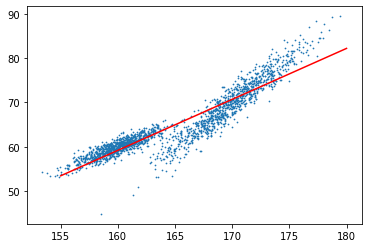

In [88]:
xs = np.linspace(155,180,100)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x, y, s=0.5)
plt.plot(xs, ys, c='r')

- Now, we will add another feature (sex)

In [89]:
X1 = pd.DataFrame({'height':x1, 'sex':0})
X2 = pd.DataFrame({'height':x2, 'sex':1})
X = pd.concat([X1, X2], ignore_index=True)  # 기존 인덱스 무시

In [90]:
X.tail()

,height,sex
1995,156.360205,1
1996,160.156134,1
1997,161.593202,1
1998,157.687010,1
1999,160.951725,1


In [91]:
y[-5:]

array([54.38685553, 60.54548407, 61.32839637, 57.6394078 , 60.27364407])

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
leg = LinearRegression()
leg.fit(X_train, y_train)

print(leg.coef_, leg.intercept_)
print(leg.score(X_test, y_test))

[1.72219275 7.21602652] -222.77760012067432
0.9141640714298965


In [93]:
## 위의 결과는 1.67*zl + 6.8*성별 - 215.43 의 선형 모델 구성
## score 는 92 % 로 향상
## 성별은 0(남성), 1(여성)

In [94]:
X_train[:10]

,height,sex
1522,159.246238,1
802,168.027086,0
1339,158.213752,1
1795,161.701624,1
51,170.328044,0
830,171.986191,0
1420,162.349614,1
1536,160.069173,1
1893,160.753250,1
301,169.962592,0


In [30]:
# K-Fold Cross validation (교차겸증)
from sklearn.model_selection import cross_val_score, KFold

In [31]:
X.shape

(2000, 2)

In [32]:
cv = KFold(n_splits=5, shuffle=True) # Whether to shuffle the data before 
                                      # splitting into batches.
score = cross_val_score(leg, X, y, cv=cv)
score, score.mean()

(array([0.91270972, 0.91945328, 0.91650805, 0.91570314, 0.91994481]),
 0.9168637996028786)

In [33]:
# decision tree
from sklearn.tree import DecisionTreeRegressor 
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train) 
print("Train score: {}".format(dec_reg.score(X_train, y_train)))
print("Test score: {}".format(dec_reg.score(X_test, y_test)))

Train score: 0.9999989253981516
Test score: 0.9054671684747342


In [34]:
X_train[:5]

,height,sex
1698,161.180020,1
944,167.891982,0
149,171.672904,0
1991,158.925901,1
299,174.056778,0


In [35]:
y_train[:5]

array([61.16288498, 67.7479092 , 72.8797315 , 59.0834815 , 79.64433545])

# Additional for Linear Regression
- adjusted R-squared

In [36]:
n_samples = 100
x1 = 3*np.random.randn(n_samples) + 170
y1 = 2*x1 - 270 + 2*np.random.randn(n_samples)

In [37]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
print(model1.score(x1.reshape(-1,1), y1))
print(model1.coef_, model1.intercept_)

0.90842758314297
[2.08235741] -283.9395600476464


In [38]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)
print(model2.score(np.c_[x1, x2], y1))
print(model2.coef_, model2.intercept_)

0.9088517183849291
[ 2.07871713 -0.11632077] -283.31905355764206


In [39]:
x3 = np.random.randn(n_samples) * 100
model3 = LinearRegression()
model3.fit(np.c_[x1, x2, x3], y1)
print(model3.score(np.c_[x1, x2, x3], y1))
print(model3.coef_, model3.intercept_)

0.9116415085579036
[ 2.07263602 -0.11001541  0.00304953] -282.2256011868716


In [40]:
x4 = np.random.randn(n_samples,20)   # 100x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 100x23

model4 = LinearRegression()
model4.fit(x_all, y1)
print(model4.score(x_all, y1))
print(model4.coef_, model4.intercept_)

0.935228507686694
[ 2.10853674 -0.16696632  0.00356852  0.49806391  0.2375304   0.07537198
  0.07866971  0.31512516  0.40259565 -0.08848238 -0.06187251  0.11271133
  0.04243409  0.11476428 -0.00424914  0.42009008  0.00798057 -0.01710049
 -0.12864999  0.31705522  0.30979618  0.07466831 -0.10932136] -288.38606264480507


- R-square is deceptive. R-squared **never decreases** when a new X variable is added to the model.

- Adjustred R-squared: 
  - It identifies the percentage of variance in the target field that is explained by the input or inputs.
  - it is always less than R-squared.
  - A value of 1 indicates a model that perfectly predicts values in the target field. 
  - A value that is less than or equal to 0 indicates a model that has no predictive value. In the real world, adjusted R2 lies between these values.
  - The definition is shown in the following example.
- The adjusted R2 tells you the percentage of variation explained by only the feature variables that actually affect the target variable.
- If n is large, not that big difference. But, when n is small, it can give significant difference.

In [41]:
def adj_R2 (X, y, R2): 
    n = len(y)      # no of samples
    p = X.shape[1]  # no of features
    return (1 - (1-R2)*(n-1)/(n-p-1))

In [42]:
model1 = LinearRegression()
model1.fit(x1.reshape(-1,1), y1)
R2 = model1.score(x1.reshape(-1,1), y1)
print(R2, adj_R2(x1.reshape(-1,1), y1, R2))

0.90842758314297 0.9074931707260615


In [43]:
x2 = np.random.randn(n_samples)
model2 = LinearRegression()
model2.fit(np.c_[x1, x2], y1)

R2 = model2.score(np.c_[x1, x2], y1)
print(R2, adj_R2(np.c_[x1, x2], y1, R2))

0.9092402043958118 0.9073688684039728


In [44]:
x4 = np.random.randn(n_samples,20)   # 1000x20
x_all = np.concatenate((np.c_[x1, x2, x3], x4), axis=1)   # 1000x23

model4 = LinearRegression()
model4.fit(x_all, y1)
R2 = model4.score(x_all, y1)
print(R2, adj_R2(x_all, y1, R2))

0.9264046063806 0.9041323162063079


- another way (use statsmodels.api)

In [45]:
# another way
import statsmodels.api as sm

X1 = sm.add_constant(x1.reshape(-1,1))
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.90842758314297 0.9074931707260615


In [46]:
X1 = sm.add_constant(np.c_[x1, x2])
result = sm.OLS(y1, X1).fit()  # OLS(ordinary least square) - linear
print (result.rsquared, result.rsquared_adj)

0.9092402043958115 0.9073688684039726


In [47]:
X1 = sm.add_constant(x_all)
result = sm.OLS(y1, X1).fit()  
print (result.rsquared, result.rsquared_adj)

0.9264046063806002 0.9041323162063082


In [48]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     41.59
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           5.56e-34
Time:                        17:33:03   Log-Likelihood:                -188.83
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      76   BIC:                             488.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -291.6111     13.175    -22.134      0.000    -317.851    -265.372
x1             2.1280      0.078     27.430      0.000       1.973       2.282
x2             0.1799      0.230      0.783      0.436      -0.278       0.637
x3             0.0025      0.002      1.219      0.227      -0.002       0.006
x4            -0.1452      0.241     -0.603      0.548      -0.625       0.334
x5            -0.0260      0.193     -0.134      0.893      -0.411       0.359
x6             0.0327      0.212      0.155      0.878      -0.389       0.454
x7             0.1552      0.218      0.711      0.479      -0.279       0.590
x8             0.2703      0.223      1.212      0.229      -0.174       0.715
x9            -0.0926      0.215     -0.431      0.668      -0.521       0.335
x10            0.0289      0.200      0.145      0.885      -0.369       0.427
x11            0.1781      0.219      0.814      0.418      -0.258       0.614
x12           -0.2077      0.202     -1.030      0.306      -0.609       0.194
x13            0.1245      0.195      0.638      0.525      -0.264       0.513
x14            0.1056      0.160      0.659      0.512      -0.213       0.425
x15            0.1508      0.203      0.741      0.461      -0.254       0.556
x16            0.4477      0.224      1.998      0.049       0.001       0.894
x17           -0.2850      0.212     -1.341      0.184      -0.708       0.138
x18            0.1774      0.186      0.955      0.343      -0.193       0.547
x19           -0.2817      0.203     -1.389      0.169      -0.686       0.122
x20           -0.0724      0.220     -0.329      0.743      -0.511       0.366
x21            0.0677      0.211      0.321      0.749      -0.352       0.488
x22            0.1273      0.216      0.589      0.557      -0.303       0.558
x23            0.0403      0.191      0.211      0.834      -0.341       0.421
==============================================================================
Omnibus:                        1.608   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.590
Skew:                          -0.296   Prob(JB):                        0.451
Kurtosis:                       2.823   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additional 2
- let's see how p-values are obtained
- https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

In [49]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 13 Dec 2022   Prob (F-statistic):           3.83e-62
Time:                        17:33:03   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

- now let's try to reproduce it

In [50]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [51]:
y[:5]

array([151.,  75., 141., 206., 135.])

In [52]:
lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))
newX.head()

,Constant,0,1,2,3,4,5,6,7,8,9
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [53]:
MSE

2932.6755365556483

In [54]:
# Note if you want to use an array, replace the two lines above with the followings:
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX[0])))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilities
0       152.1335            2.576    59.061            NaN
1       -10.0122           59.749    -0.168            NaN
2      -239.8191           61.222    -3.917            NaN
3       519.8398           66.534     7.813            NaN
4       324.3904           65.422     4.958            NaN
5      -792.1842          416.684    -1.901            NaN
6       476.7458          339.035     1.406            NaN
7       101.0446          212.533     0.475            NaN
8       177.0642          161.476     1.097            NaN
9       751.2793          171.902     4.370            NaN
10       67.6254           65.984     1.025            NaN


# Exercise

In [55]:
df = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                   'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
other = pd.DataFrame({'key2': ['K0', 'K1', 'K2'],
                      'B': ['B0', 'B1', 'B2']})

In [56]:
df.head()

,key1,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4


In [57]:
other.head()

,key2,B
0,K0,B0
1,K1,B1
2,K2,B2


In [58]:
df.join(other)   # by index

,key1,A,key2,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN
